# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
num_mice = combined_data['Mouse ID'].nunique()
num_mice

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

duplicates_sorted = duplicates.sort_values(by=['Mouse ID', 'Timepoint'])
duplicates_sorted

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_ids = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()

duplicate_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mouse_ids)]

duplicate_data_sorted = duplicate_data.sort_values(by=['Mouse ID', 'Timepoint'])
duplicate_data_sorted

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
cleaned_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.
num_unique_mice_cleaned = cleaned_data['Mouse ID'].nunique()
num_unique_mice_cleaned

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
# Calculate summary statistics for each drug regimen
summary_stats = cleaned_data.groupby('Drug Regimen').agg(
    mean_tumor_volume=('Tumor Volume (mm3)', 'mean'),
    median_tumor_volume=('Tumor Volume (mm3)', 'median'),
    variance_tumor_volume=('Tumor Volume (mm3)', 'var'),
    std_dev_tumor_volume=('Tumor Volume (mm3)', 'std'),
    sem_tumor_volume=('Tumor Volume (mm3)', lambda x: st.sem(x))).reset_index()

# Display the summary statistics table
summary_stats

,Drug Regimen,mean_tumor_volume,median_tumor_volume,variance_tumor_volume,std_dev_tumor_volume,sem_tumor_volume
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [15]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = cleaned_data.groupby('Drug Regimen').agg(
    mean_tumor_volume=('Tumor Volume (mm3)', 'mean'),
    median_tumor_volume=('Tumor Volume (mm3)', 'median'),
    variance_tumor_volume=('Tumor Volume (mm3)', 'var'),
    std_dev_tumor_volume=('Tumor Volume (mm3)', 'std'),
    sem_tumor_volume=('Tumor Volume (mm3)', lambda x: st.sem(x))
).reset_index()

# Display the summary statistics table
summary_stats


,Drug Regimen,mean_tumor_volume,median_tumor_volume,variance_tumor_volume,std_dev_tumor_volume,sem_tumor_volume
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

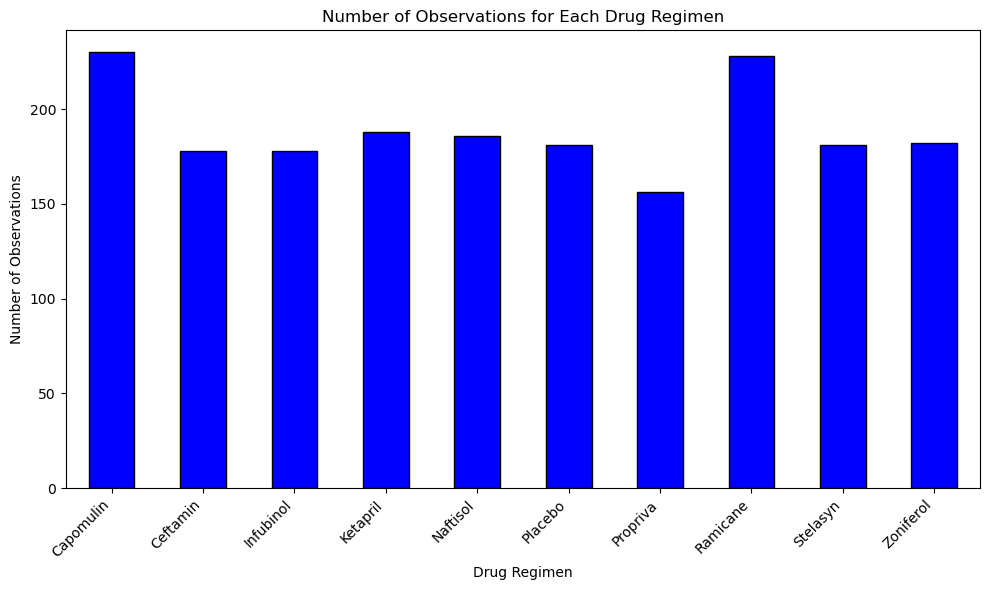

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts = cleaned_data.groupby('Drug Regimen').size()

ax = drug_regimen_counts.plot(kind='bar', figsize=(10, 6), color='blue', edgecolor='black')

ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Number of Observations')
ax.set_title('Number of Observations for Each Drug Regimen')
ax.set_xticks(range(len(drug_regimen_counts)))
ax.set_xticklabels(drug_regimen_counts.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

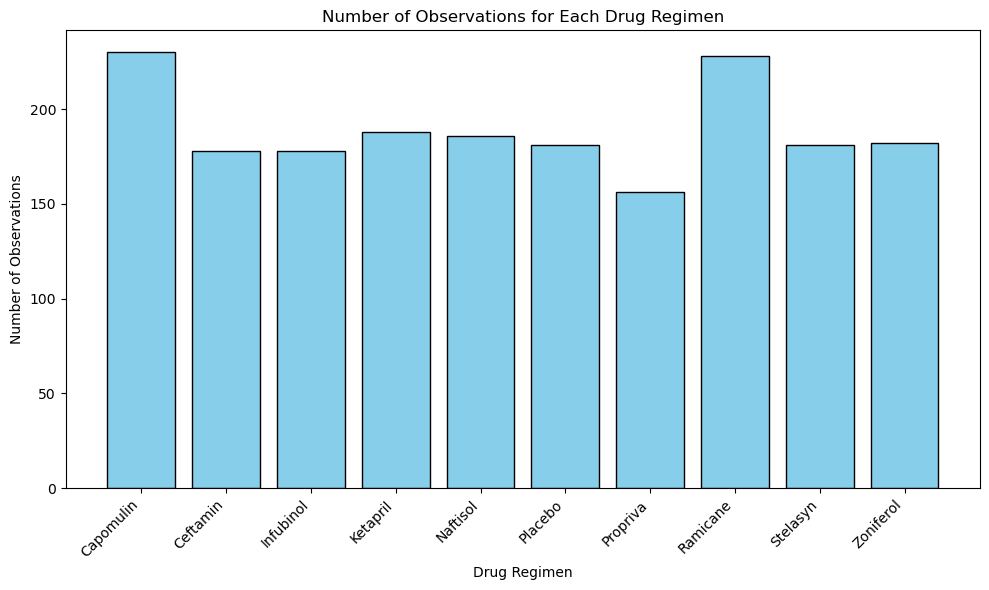

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_counts = cleaned_data.groupby('Drug Regimen').size()

plt.figure(figsize=(10, 6))
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values, color='skyblue', edgecolor='black')

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observations')
plt.title('Number of Observations for Each Drug Regimen')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

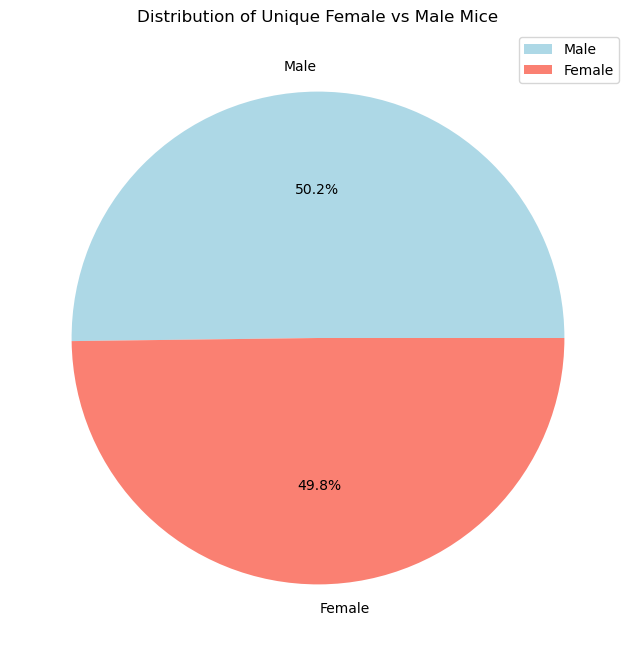

In [18]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender

# Make the pie chart
unique_mice = cleaned_data.drop_duplicates(subset='Mouse ID')
gender_counts = unique_mice['Sex'].value_counts()

ax = gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'salmon'], figsize=(8, 8), legend=True)

ax.set_title('Distribution of Unique Female vs Male Mice')

plt.ylabel('')
plt.show()


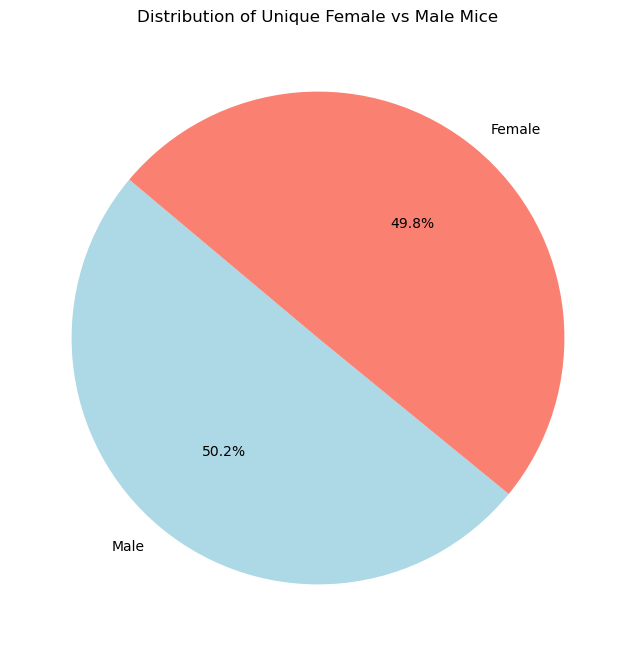

In [19]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender

# Make the pie chart
unique_mice = cleaned_data.drop_duplicates(subset='Mouse ID')
gender_counts = unique_mice['Sex'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightblue', 'salmon'], startangle=140)

plt.title('Distribution of Unique Female vs Male Mice')

plt.show()


## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint = cleaned_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_data = pd.merge(last_timepoint, cleaned_data, on=['Mouse ID', 'Timepoint'])

# Step 2: Filter for the specified treatment regimens
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volumes = last_timepoint_data[last_timepoint_data['Drug Regimen'].isin(treatment_regimens)]

# Display the resulting DataFrame
final_tumor_volumes



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
239,y769,45,68.594745,4,Ceftamin,Female,6,27
240,y793,45,31.896238,2,Capomulin,Male,17,17
241,y865,45,64.729837,3,Ceftamin,Male,23,26
245,z578,45,30.638696,0,Ramicane,Male,11,16


In [21]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    subset = final_tumor_volumes[final_tumor_volumes['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    # add subset
    tumor_vol_data.append(subset)
    # Calculate the quartiles and IQR
    quartiles = subset.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
    # Determine outliers using the upper and lower bounds
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
    
    # Print the results
    print(f"{treatment}:")
    print(f"  Quartiles: 25th percentile = {lower_q}, 50th percentile (Median) = {quartiles[0.5]}, 75th percentile = {upper_q}")
    print(f"  IQR = {iqr}")
    print(f"  Lower bound for outliers = {lower_bound}")
    print(f"  Upper bound for outliers = {upper_bound}")
    print(f"  Number of potential outliers: {subset[(subset < lower_bound) | (subset > upper_bound)].count()}")
    print()


Capomulin:
  Quartiles: 25th percentile = 32.37735684, 50th percentile (Median) = 38.1251644, 75th percentile = 40.1592203
  IQR = 7.781863460000004
  Lower bound for outliers = 20.70456164999999
  Upper bound for outliers = 51.83201549
  Number of potential outliers: 0

Ramicane:
  Quartiles: 25th percentile = 31.56046955, 50th percentile (Median) = 36.56165229, 75th percentile = 40.65900627
  IQR = 9.098536719999998
  Lower bound for outliers = 17.912664470000003
  Upper bound for outliers = 54.30681135
  Number of potential outliers: 0

Infubinol:
  Quartiles: 25th percentile = 54.04860769, 50th percentile (Median) = 60.16518046, 75th percentile = 65.52574285
  IQR = 11.477135160000003
  Lower bound for outliers = 36.83290494999999
  Upper bound for outliers = 82.74144559000001
  Number of potential outliers: 1

Ceftamin:
  Quartiles: 25th percentile = 48.72207785, 50th percentile (Median) = 59.85195552, 75th percentile = 64.29983003
  IQR = 15.577752179999997
  Lower bound for outl

<Figure size 1000x600 with 0 Axes>

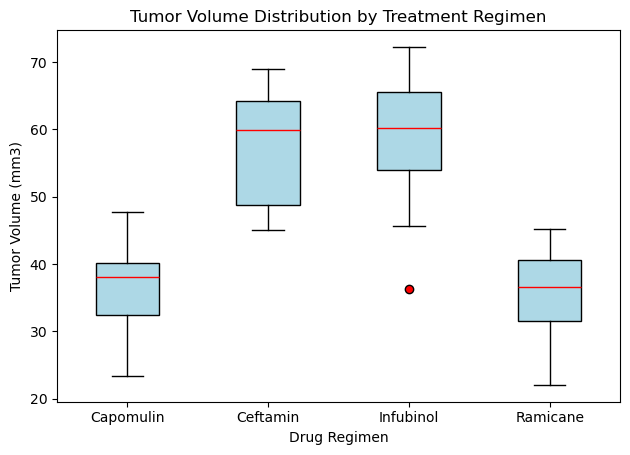

In [22]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
boxplot_data = final_tumor_volumes[['Drug Regimen', 'Tumor Volume (mm3)']]

# Create the box plot
plt.figure(figsize=(10, 6))
boxplot = boxplot_data.boxplot(by='Drug Regimen', column='Tumor Volume (mm3)', grid=False, 
                               patch_artist=True, 
                               boxprops=dict(facecolor='lightblue', color='black'),
                               whiskerprops=dict(color='black'),
                               capprops=dict(color='black'),
                               medianprops=dict(color='red'),
                               flierprops=dict(markerfacecolor='red', marker='o'))

# Set labels and title
plt.title('Tumor Volume Distribution by Treatment Regimen')
plt.suptitle('')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.tight_layout()
plt.show()


## Line and Scatter Plots

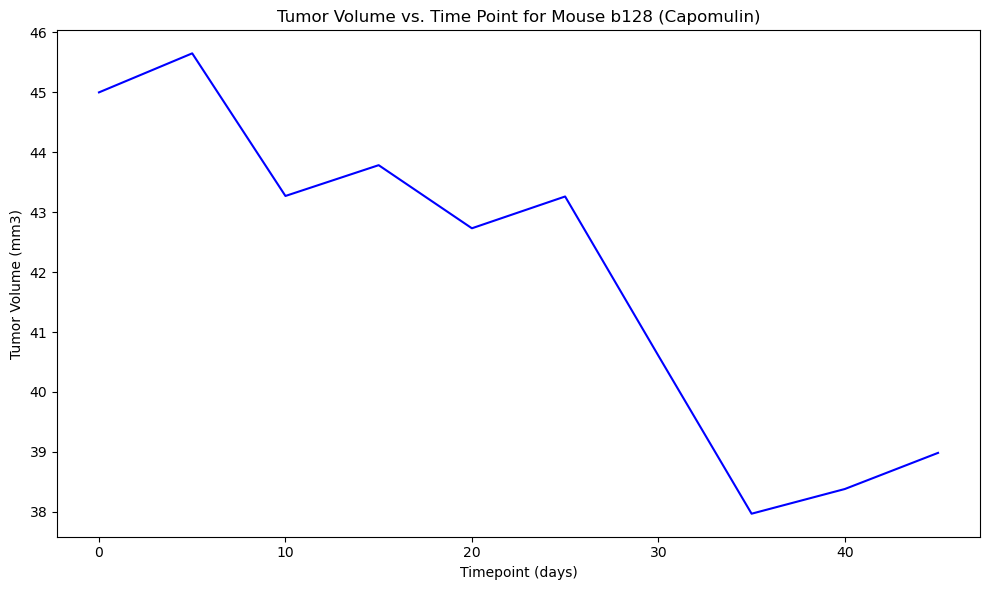

In [23]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = final_tumor_volumes[final_tumor_volumes['Drug Regimen'] == 'Capomulin']['Mouse ID'].unique()[0]
mouse_data = cleaned_data[(cleaned_data['Mouse ID'] == mouse_id) & (cleaned_data['Drug Regimen'] == 'Capomulin')]

plt.figure(figsize=(10, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], linestyle='-', color='b')

plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin)')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.tight_layout()
plt.show()

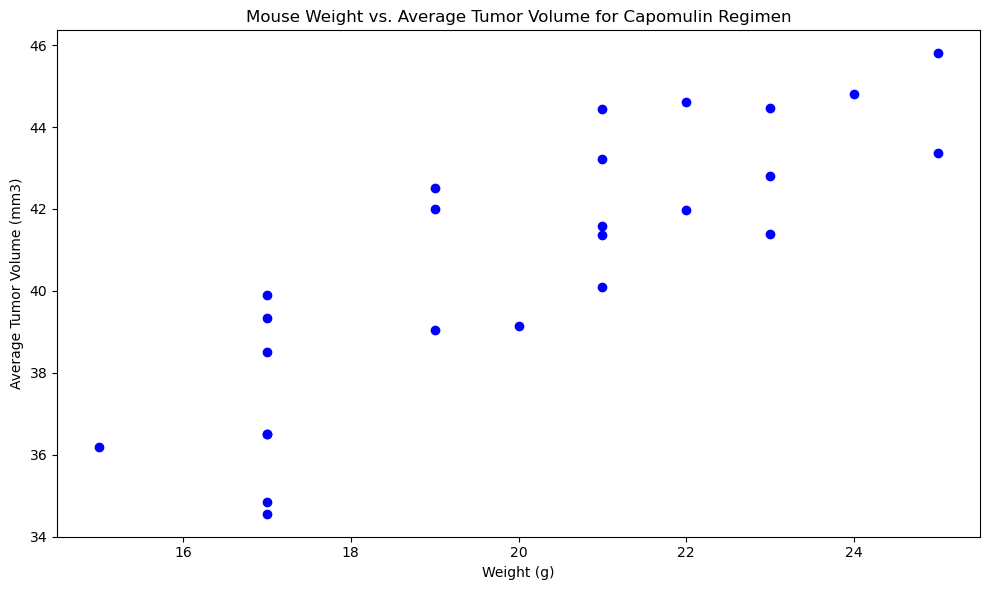

In [26]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
average_tumor_volume = average_tumor_volume.rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume (mm3)'})
mouse_data = pd.merge(average_tumor_volume, capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates(), on='Mouse ID')

plt.figure(figsize=(10, 6))
plt.scatter(mouse_data['Weight (g)'], mouse_data['Average Tumor Volume (mm3)'], marker='o', color='b')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.tight_layout()
plt.show()


## Correlation and Regression

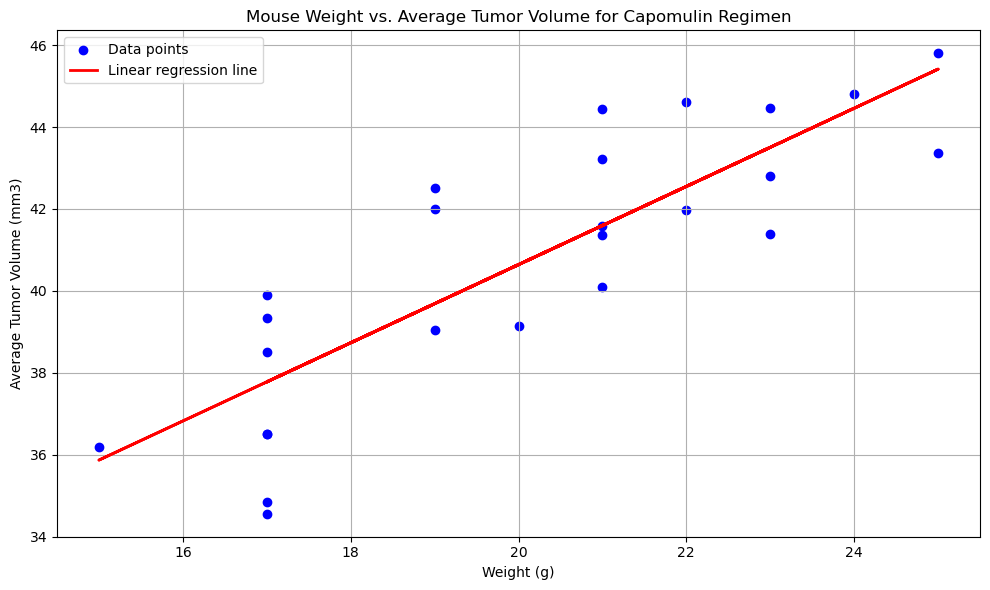

Correlation Coefficient: 0.84
Linear Regression Model: y = 0.95x + 21.55


In [28]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
weights = mouse_data['Weight (g)']
avg_tumor_volumes = mouse_data['Average Tumor Volume (mm3)']
correlation_coefficient = np.corrcoef(weights, avg_tumor_volumes)[0, 1]
slope, intercept, r_value, p_value, std_err = st.linregress(weights, avg_tumor_volumes)
regression_line = slope * weights + intercept

plt.figure(figsize=(10, 6))
plt.scatter(weights, avg_tumor_volumes, marker='o', color='b', label='Data points')
plt.plot(weights, regression_line, color='r', linewidth=2, label='Linear regression line')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Correlation Coefficient: {correlation_coefficient:.2f}")
print(f"Linear Regression Model: y = {slope:.2f}x + {intercept:.2f}")
